# Min-Max Scaling
- type of normalisation scaling
- Usually done when the minimum and maximum value of the dataset is known
- ex: In image processing, we know the pixel brightness ranges form 0-255. Hence we can use min-max scaling here.

## Data collection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Datasets/wine_data.csv',header = None, usecols = [0,1,2])
df.columns=['Class Labels','Alcohol','Malic acid']

In [5]:
df.shape

(178, 3)

In [6]:
df.sample(5)

,Class Labels,Alcohol,Malic acid
101,2,12.60,1.34
36,1,13.28,1.64
125,2,12.07,2.16
55,1,13.56,1.73
4,1,13.24,2.59


## Data Visualization


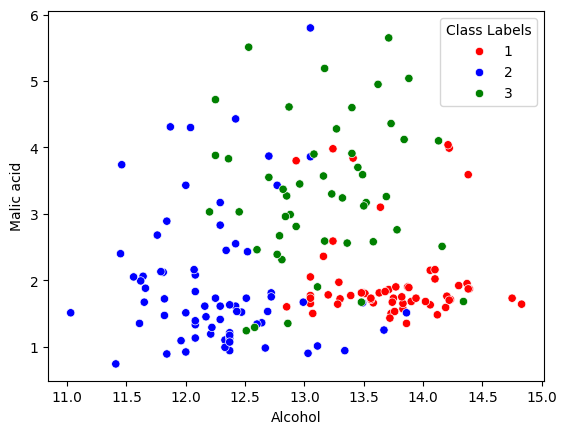

In [7]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class Labels', palette=color_dict)
plt.show()

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
X.sample(5)

,Alcohol,Malic acid
38,13.07,1.50
100,12.08,2.08
152,13.11,1.90
98,12.37,1.07
11,14.12,1.48


In [11]:
y.sample(5)

63     2
111    2
164    3
142    3
10     1
Name: Class Labels, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(106, 2)
(72, 2)


## Min-Max normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
#this will remember the parameters of the data i.e. min and max values
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [18]:
X_train.sample(5)

,Alcohol,Malic acid
51,0.607527,0.226891
92,0.857527,0.651261
78,0.494624,0.781513
12,0.575269,0.903361
88,0.543011,0.243697


In [19]:
X_test.sample(5)

,Alcohol,Malic acid
46,0.422043,0.329832
52,0.680108,0.172269
61,0.610215,0.174370
21,0.543011,0.159664
64,0.338710,0.109244


In [20]:
X_train.describe()

,Alcohol,Malic acid
count,106.000000,106.000000
mean,0.526096,0.313223
std,0.223932,0.239615
min,0.000000,0.000000
25%,0.350134,0.155462
50%,0.540323,0.209034
75%,0.709005,0.476366
max,1.000000,1.000000


- You can see the min value is scaled to 0 and max value is scaled to 1

## Effect of this scaling
**Note**:
- The values will be scaled between 0 and 1.
- The distribution of data may or may not get affected.
- The impact of outliers get reduced which will cause problems later.
  